CHAPTER 05 트리 알고리즘  
05-1 결정트리

In [38]:
# 데이터 불러오기
import pandas as pd  
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [39]:
wine.info() # 데이터프레임 각 열의 데이터 타입과 누락된 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [40]:
wine.describe() # 열에 대한 간략한 통계 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [41]:
data = wine[['alcohol','sugar','pH']]
target = wine['class']

In [42]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정  
test_size=0.2는 테스트 세트를 20%로 지정하는 것

In [43]:
print(train_input.shape, test_input.shape) # 훈련, 테스트세트 확인

(5197, 3) (1300, 3)


In [44]:
# 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


> 과소적합 보임

In [46]:
print(lr.coef_, lr.intercept_) # 학습계수, 절편 출력

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


[결정트리]  
데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있음  

In [47]:
from sklearn.tree import DecisionTreeClassifier # 결정트리 모델 import
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target) # 훈련
print(dt.score(train_scaled, train_target)) # 훈련 세트 점수
print(dt.score(test_scaled, test_target)) # 테스트 세트 점수

0.996921300750433
0.8592307692307692


과대적합 보임

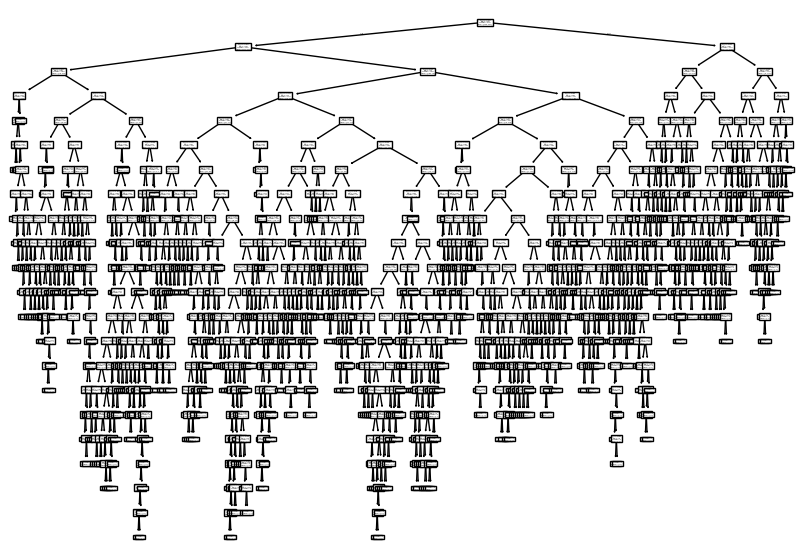

In [48]:
# plot_tree()로 트리그림 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

결정트리는 위에서부터 아래로 거꾸로 자라남  
맨 위의 노드 = '루트 노드'  
맨 아래의 노드 = '리프 노드'

[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

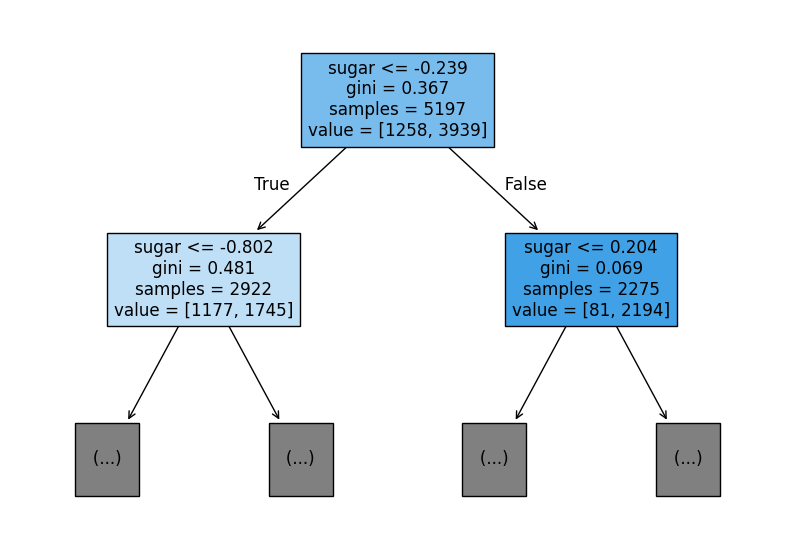

In [49]:
# 트리의 깊이 제한해 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])

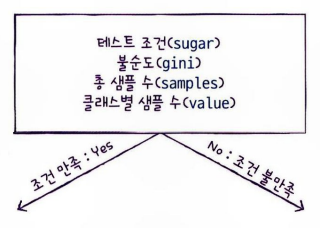

plot_tree() 함수에서 filled=True로 지정하면 클래스마다 색깔을 부여하고,  
어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시함(직관적)  

[결정 트리에서 예측하는 법]  
리프 노드에서 가장 많은 클래스가 예측 클래스가 됨(k-최근접 이웃과 비슷)

[지니 불순도(gini)]  
- 한 그룹 안에 클래스가 얼마나 섞여 있는가를 나타내는 값
- DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값  
criterion 매개변수 = 노드에서 데이터를 분할할 기준  
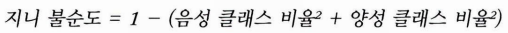

> 노드의 두 클래스 비율이 1/2로 섞여 있으면 '지니 불순도가 0.5'  
> 노드에 하나의 클래스만 있는 순수한 노드의 경우 '지니 불순도는 0'으로 가장 작음

[결정 트리]  
: 전체 데이터에서 모든 특성(alcohol, sugar, pH)에 대해 지니 불순도 감소량을 계산    
--> 불순도를 가장 많이 줄여주는 특성으로 먼저 분할 --> 반복  
- 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴  

[정보 이득] 
: 부모와 자식 노드 사이의 불순도 차이
: 값이 클 수록 좋은 분할

In [50]:
# 가지치기(트리의 최대 깊이 지정)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


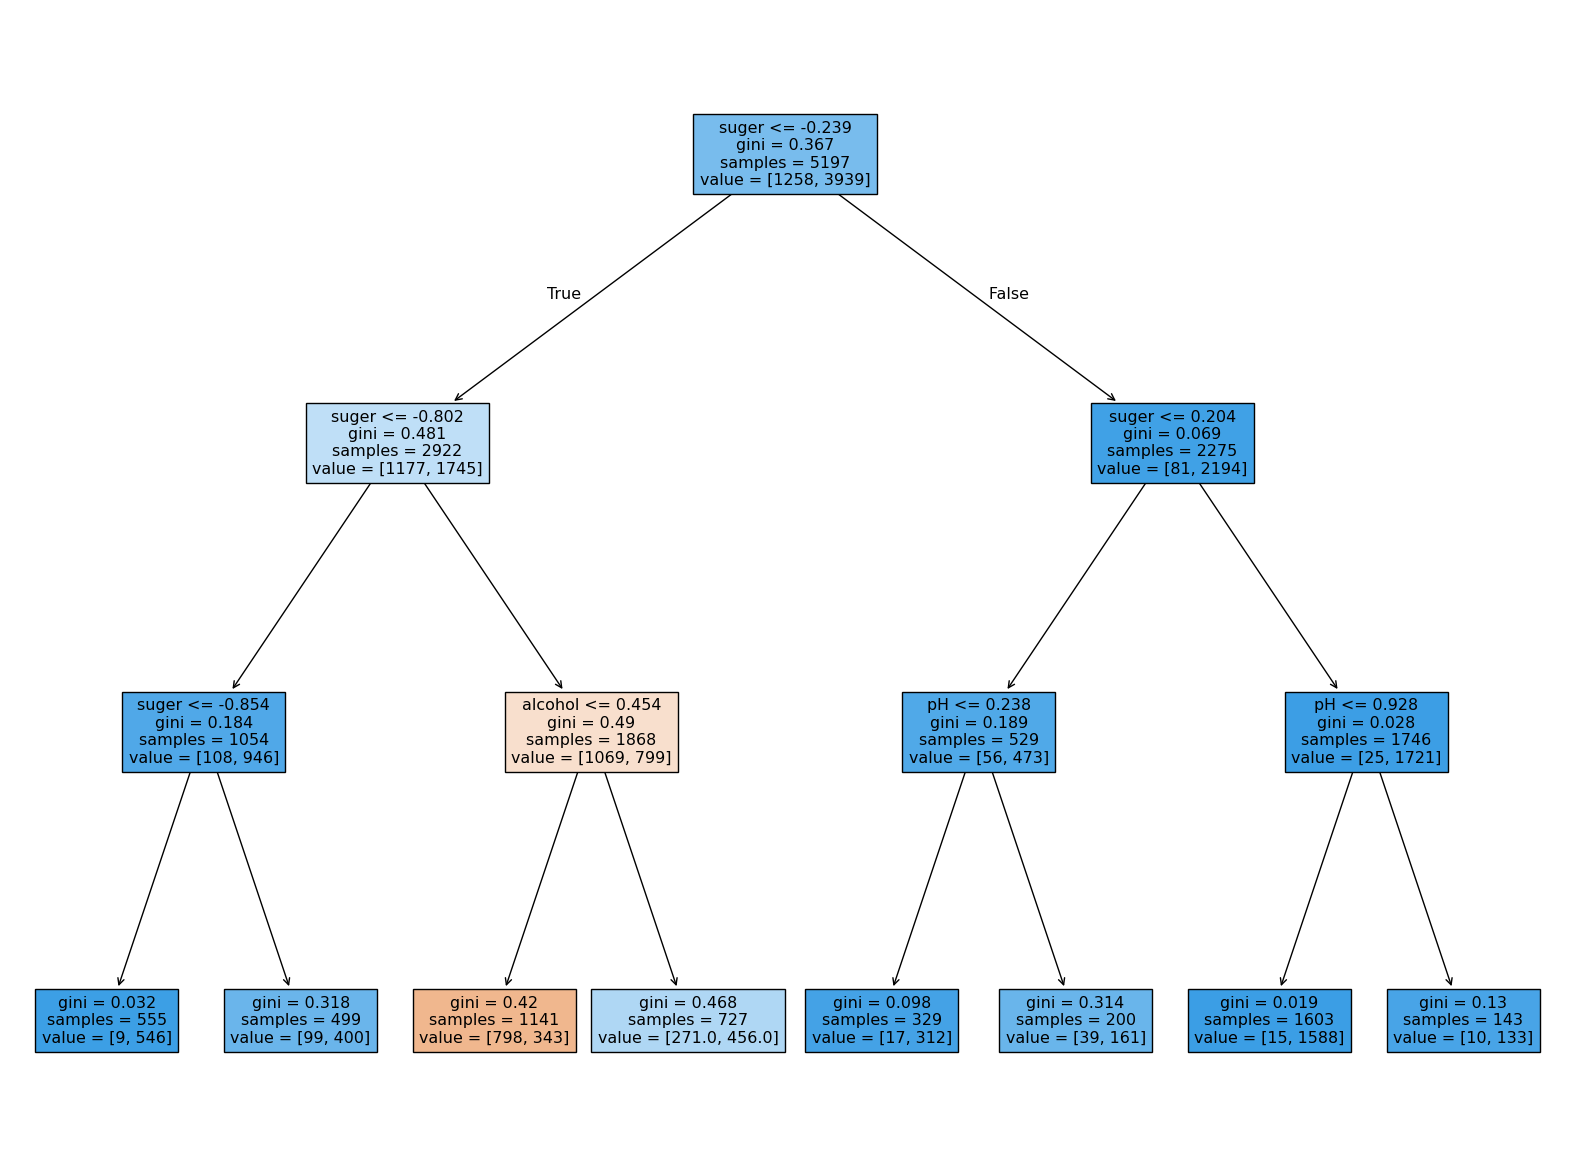

In [51]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','suger','pH'])
plt.show()

결정 트리는 표준화 전처리 과정이 필요 없음

In [52]:
# 전처리 전의 훈련 세트와 테스트 세트로 결정 트리 모델 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


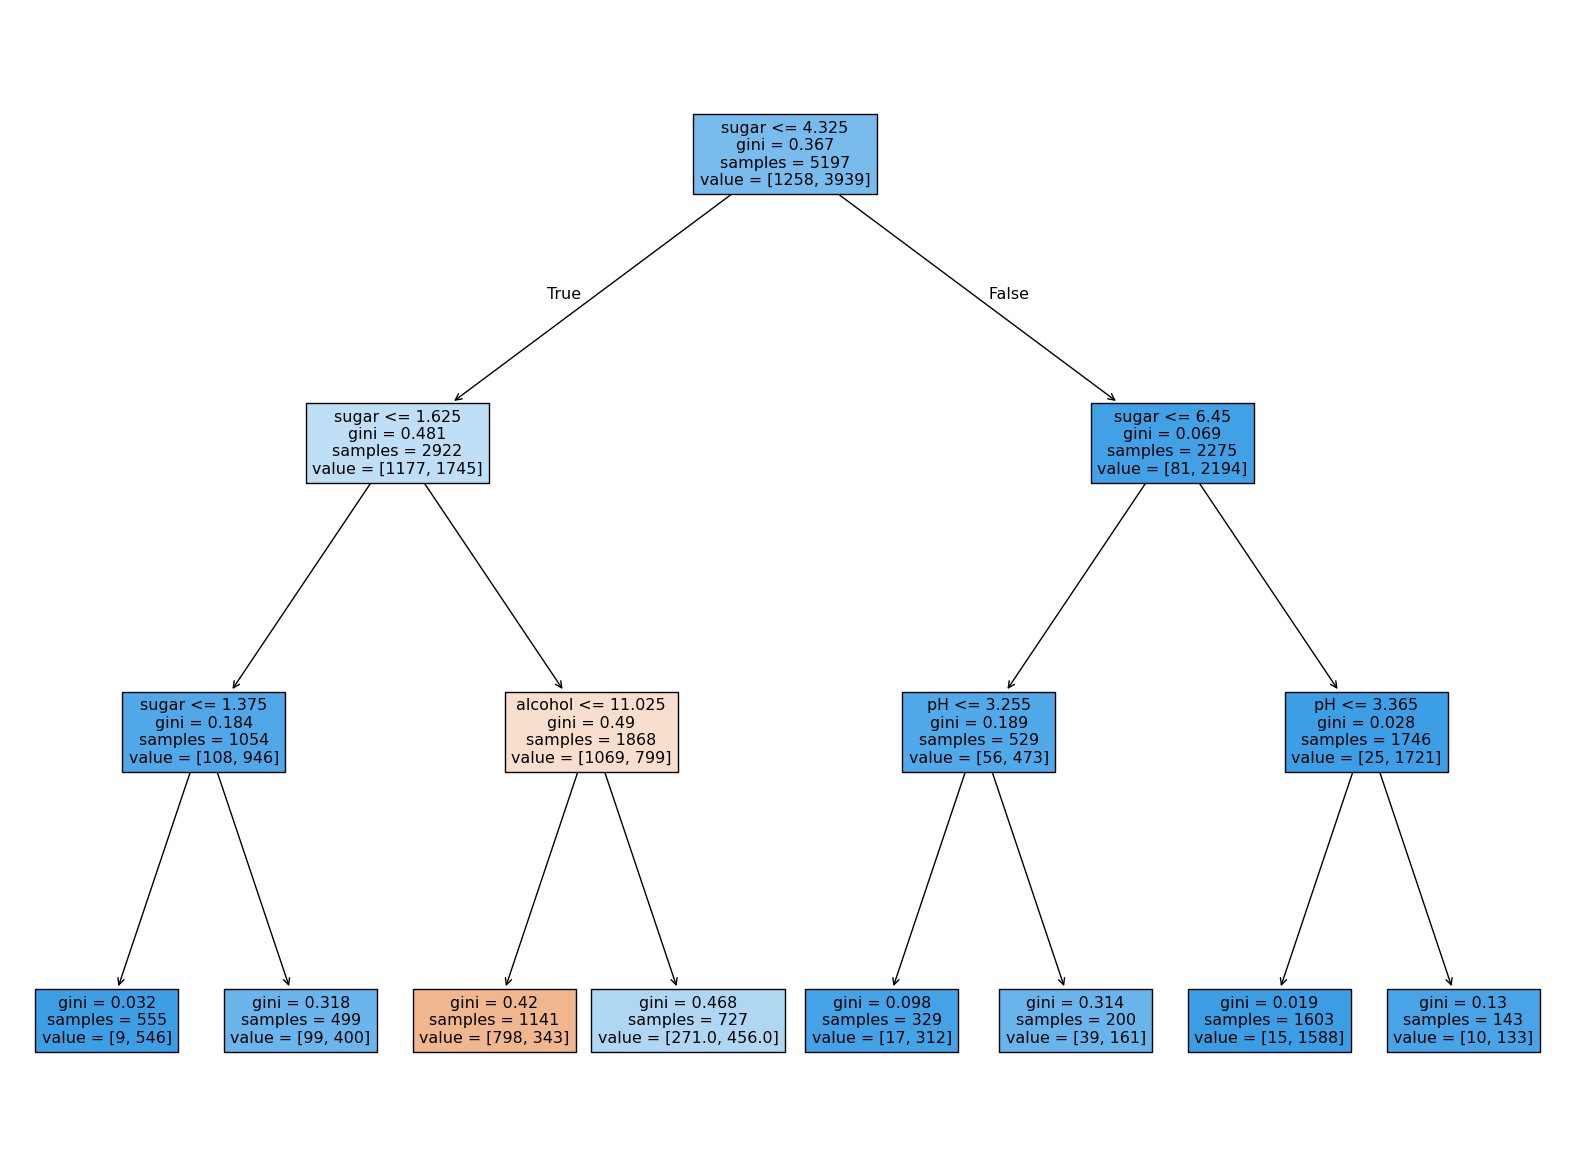

In [53]:
# 트리 그리기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [54]:
print(dt.feature_importances_) # 특성 중요도 확인

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
# 연습문제
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


<function matplotlib.pyplot.show(close=None, block=None)>

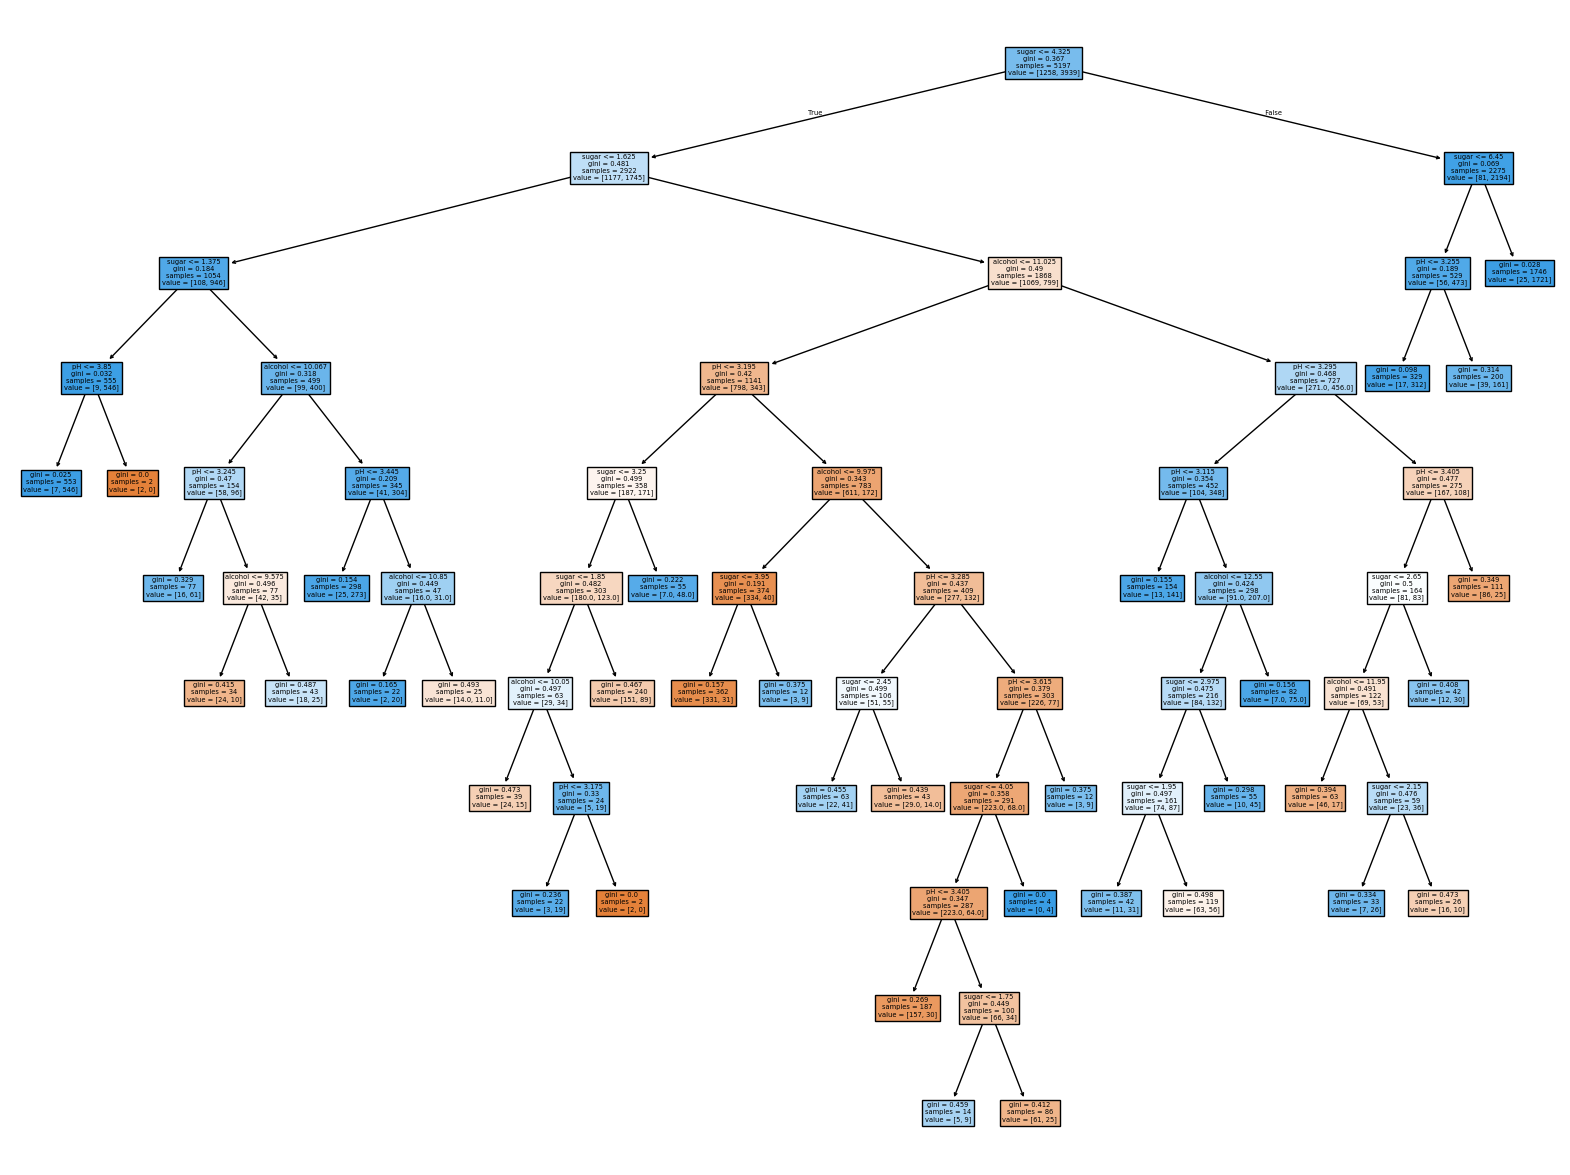

In [60]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show